In [22]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder
from sklearn.model_selection import GridSearchCV
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['axes.titlesize'] = 16

# 设置jupyter数据框最大显示的列数
pd.set_option('max_columns',100)
train_data = pd.read_csv('../train_data.csv',encoding='gb2312')
targets = pd.read_csv('../targets.csv',encoding='gb2312')
train_data.drop(['体检日期'],axis=1,inplace=True)

In [93]:
tau = 7.5
train_up = train_data[targets['血糖']>tau]
train = train_data[targets['血糖']<=tau]
targets_up = targets[targets['血糖']>tau]
target = targets[targets['血糖']<=tau]
# label = np.where(targets['血糖']>7,1,0)

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score,roc_curve,auc
from sklearn.cross_validation import train_test_split
from xgboost.sklearn import XGBClassifier
import xgboost as xgb_class

#  划分样本集
train_x,test_x,train_y,test_y = train_test_split(train_data,targets,test_size=0.18,random_state=66)
tau = 7
train_up = train_x[targets['血糖']>tau]
targets_up = targets[targets['血糖']>tau]
train_labels = np.where(train_y>tau,1,0)
test_labels = np.where(test_y>tau,1,0)
scale_weight = float(len(train_labels)-train_labels.sum())/train_labels.sum()
# label = np.where(targets['血糖']>7,1,0)
dtrain = xgboost.DMatrix(train_x,label=train_labels)
dtest = xgboost.DMatrix(test_x)
watchlist  = [(dtrain,'train')]
# 设置参数
params={'booster':'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth':4,
    'lambda':200,
    'subsample':0.75,
    'colsample_bytree':0.7,
    'eta': 0.01,#0.002
    'seed':1024,
    'nthread':3,
    'reg_alpha':0.1
    }
xgb = xgboost.train(params,dtrain,num_boost_round=2000,evals=watchlist,early_stopping_rounds=50)
# cv_log = xgboost.cv(params,dtrain,num_boost_round=2000,nfold=4,metrics='auc',early_stopping_rounds=50,seed=1024)
# plt.plot(cv_log.index,cv_log['test-auc-mean'],label='test_auc')
# plt.plot(cv_log.index,cv_log['train-auc-mean'],label='train_auc')
# plt.legend(loc='upper right')
# plt.show()
# 训练
# xgb.train(train_x, train_labels)
# 预测
# pre_y = xgboost.predict_proba(test_x)[:,1]
# pre_y_categ = xgboost.predict(test_x)
# # 计算auc
# fpr, tpr, thresholds = roc_curve(test_y, pre_y)
# auc=auc(fpr, tpr)
# f1 = f1_score(test_y,pre_y_categ)
# print("AUC得分为：")
# print(auc)
# print('f1-score为：')
# print(f1)
# # 画出特征重要性图
# features = list(train_data.columns)
# feature_important = xgb.feature_importances_
# df_feature = pd.DataFrame({'features':features,'feature_important':feature_important})
# df_feature.sort_values(by='feature_important',inplace=True)
# plt.figure(figsize=(10,20))
# plt.barh(np.arange(len(features)),df_feature['feature_important'])
# plt.yticks(np.arange(len(features)),df_feature['features'],fontsize=9,rotation=15)
# plt.show()

[0]	train-auc:0.51917
Will train until train-auc hasn't improved in 50 rounds.
[1]	train-auc:0.530292
[2]	train-auc:0.537833
[3]	train-auc:0.53998
[4]	train-auc:0.540973
[5]	train-auc:0.542886
[6]	train-auc:0.555076
[7]	train-auc:0.56132
[8]	train-auc:0.561193


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[9]	train-auc:0.564203
[10]	train-auc:0.56659
[11]	train-auc:0.584654
[12]	train-auc:0.584659
[13]	train-auc:0.584568
[14]	train-auc:0.584523
[15]	train-auc:0.584514
[16]	train-auc:0.584505
[17]	train-auc:0.58532
[18]	train-auc:0.58539
[19]	train-auc:0.58615
[20]	train-auc:0.58618
[21]	train-auc:0.586078
[22]	train-auc:0.598122
[23]	train-auc:0.597871
[24]	train-auc:0.597838
[25]	train-auc:0.597816
[26]	train-auc:0.599999
[27]	train-auc:0.602729
[28]	train-auc:0.604663
[29]	train-auc:0.605572
[30]	train-auc:0.605619
[31]	train-auc:0.606389
[32]	train-auc:0.610705
[33]	train-auc:0.610699
[34]	train-auc:0.616436
[35]	train-auc:0.616549
[36]	train-auc:0.619938
[37]	train-auc:0.619879
[38]	train-auc:0.625931
[39]	train-auc:0.625978
[40]	train-auc:0.625919
[41]	train-auc:0.625742
[42]	train-auc:0.630176
[43]	train-auc:0.630157
[44]	train-auc:0.630109
[45]	train-auc:0.634711
[46]	train-auc:0.634548
[47]	train-auc:0.634814
[48]	train-auc:0.634842
[49]	train-auc:0.634856
[50]	train-auc:0.63504

[342]	train-auc:0.833526
[343]	train-auc:0.833564
[344]	train-auc:0.833648
[345]	train-auc:0.833731
[346]	train-auc:0.833816
[347]	train-auc:0.83402
[348]	train-auc:0.83416
[349]	train-auc:0.834194
[350]	train-auc:0.834265
[351]	train-auc:0.834364
[352]	train-auc:0.83441
[353]	train-auc:0.834451
[354]	train-auc:0.83447
[355]	train-auc:0.834536
[356]	train-auc:0.834576
[357]	train-auc:0.83472
[358]	train-auc:0.834914
[359]	train-auc:0.835208
[360]	train-auc:0.835293
[361]	train-auc:0.835369
[362]	train-auc:0.8355
[363]	train-auc:0.835584
[364]	train-auc:0.835836
[365]	train-auc:0.835947
[366]	train-auc:0.83592
[367]	train-auc:0.836422
[368]	train-auc:0.836476
[369]	train-auc:0.836639
[370]	train-auc:0.836844
[371]	train-auc:0.836905
[372]	train-auc:0.837118
[373]	train-auc:0.83733
[374]	train-auc:0.837426
[375]	train-auc:0.837461
[376]	train-auc:0.83745
[377]	train-auc:0.837588
[378]	train-auc:0.837738
[379]	train-auc:0.837984
[380]	train-auc:0.838152
[381]	train-auc:0.83826
[382]	train

[672]	train-auc:0.864033
[673]	train-auc:0.864102
[674]	train-auc:0.864139
[675]	train-auc:0.864174
[676]	train-auc:0.864221
[677]	train-auc:0.864295
[678]	train-auc:0.864312
[679]	train-auc:0.864359
[680]	train-auc:0.864452
[681]	train-auc:0.864483
[682]	train-auc:0.864535
[683]	train-auc:0.864649
[684]	train-auc:0.86469
[685]	train-auc:0.864784
[686]	train-auc:0.864844
[687]	train-auc:0.864885
[688]	train-auc:0.864912
[689]	train-auc:0.864944
[690]	train-auc:0.864992
[691]	train-auc:0.864988
[692]	train-auc:0.865131
[693]	train-auc:0.865301
[694]	train-auc:0.865402
[695]	train-auc:0.865484
[696]	train-auc:0.865566
[697]	train-auc:0.865724
[698]	train-auc:0.865754
[699]	train-auc:0.8659
[700]	train-auc:0.865966
[701]	train-auc:0.866072
[702]	train-auc:0.8661
[703]	train-auc:0.866266
[704]	train-auc:0.866319
[705]	train-auc:0.86634
[706]	train-auc:0.866472
[707]	train-auc:0.866635
[708]	train-auc:0.866758
[709]	train-auc:0.866953
[710]	train-auc:0.867005
[711]	train-auc:0.867205
[712]	

[1002]	train-auc:0.885456
[1003]	train-auc:0.885499
[1004]	train-auc:0.885523
[1005]	train-auc:0.885557
[1006]	train-auc:0.885619
[1007]	train-auc:0.885703
[1008]	train-auc:0.885737
[1009]	train-auc:0.885777
[1010]	train-auc:0.885833
[1011]	train-auc:0.885877
[1012]	train-auc:0.885938
[1013]	train-auc:0.886029
[1014]	train-auc:0.886033
[1015]	train-auc:0.886079
[1016]	train-auc:0.88609
[1017]	train-auc:0.886172
[1018]	train-auc:0.886244
[1019]	train-auc:0.886278
[1020]	train-auc:0.886319
[1021]	train-auc:0.88634
[1022]	train-auc:0.886392
[1023]	train-auc:0.886394
[1024]	train-auc:0.886466
[1025]	train-auc:0.886515
[1026]	train-auc:0.886568
[1027]	train-auc:0.886638
[1028]	train-auc:0.886667
[1029]	train-auc:0.886758
[1030]	train-auc:0.886817
[1031]	train-auc:0.886884
[1032]	train-auc:0.88695
[1033]	train-auc:0.886988
[1034]	train-auc:0.887014
[1035]	train-auc:0.887066
[1036]	train-auc:0.887095
[1037]	train-auc:0.887142
[1038]	train-auc:0.887224
[1039]	train-auc:0.887291
[1040]	train-au

[1319]	train-auc:0.89879
[1320]	train-auc:0.898852
[1321]	train-auc:0.898863
[1322]	train-auc:0.898897
[1323]	train-auc:0.898951
[1324]	train-auc:0.898989
[1325]	train-auc:0.899035
[1326]	train-auc:0.899074
[1327]	train-auc:0.899103
[1328]	train-auc:0.899141
[1329]	train-auc:0.899132
[1330]	train-auc:0.899195
[1331]	train-auc:0.899236
[1332]	train-auc:0.899273
[1333]	train-auc:0.899309
[1334]	train-auc:0.899318
[1335]	train-auc:0.899381
[1336]	train-auc:0.899412
[1337]	train-auc:0.899432
[1338]	train-auc:0.899483
[1339]	train-auc:0.899508
[1340]	train-auc:0.899522
[1341]	train-auc:0.899557
[1342]	train-auc:0.899579
[1343]	train-auc:0.899627
[1344]	train-auc:0.899658
[1345]	train-auc:0.899655
[1346]	train-auc:0.899694
[1347]	train-auc:0.899705
[1348]	train-auc:0.899753
[1349]	train-auc:0.899751
[1350]	train-auc:0.899749
[1351]	train-auc:0.899788
[1352]	train-auc:0.89981
[1353]	train-auc:0.899849
[1354]	train-auc:0.89988
[1355]	train-auc:0.899942
[1356]	train-auc:0.899984
[1357]	train-au

[1636]	train-auc:0.908167
[1637]	train-auc:0.908192
[1638]	train-auc:0.908231
[1639]	train-auc:0.908249
[1640]	train-auc:0.908291
[1641]	train-auc:0.908309
[1642]	train-auc:0.908326
[1643]	train-auc:0.908356
[1644]	train-auc:0.908365
[1645]	train-auc:0.908389
[1646]	train-auc:0.90842
[1647]	train-auc:0.908431
[1648]	train-auc:0.908446
[1649]	train-auc:0.908442
[1650]	train-auc:0.90847
[1651]	train-auc:0.908498
[1652]	train-auc:0.908527
[1653]	train-auc:0.908568
[1654]	train-auc:0.908576
[1655]	train-auc:0.908575
[1656]	train-auc:0.908587
[1657]	train-auc:0.908566
[1658]	train-auc:0.908586
[1659]	train-auc:0.908579
[1660]	train-auc:0.908607
[1661]	train-auc:0.908637
[1662]	train-auc:0.908669
[1663]	train-auc:0.908681
[1664]	train-auc:0.908732
[1665]	train-auc:0.908726
[1666]	train-auc:0.908747
[1667]	train-auc:0.908756
[1668]	train-auc:0.908753
[1669]	train-auc:0.908806
[1670]	train-auc:0.908816
[1671]	train-auc:0.908868
[1672]	train-auc:0.908893
[1673]	train-auc:0.908923
[1674]	train-a

[1953]	train-auc:0.914891
[1954]	train-auc:0.914938
[1955]	train-auc:0.914969
[1956]	train-auc:0.914982
[1957]	train-auc:0.914996
[1958]	train-auc:0.915009
[1959]	train-auc:0.91503
[1960]	train-auc:0.915028
[1961]	train-auc:0.915056
[1962]	train-auc:0.915081
[1963]	train-auc:0.915111
[1964]	train-auc:0.91512
[1965]	train-auc:0.915135
[1966]	train-auc:0.91515
[1967]	train-auc:0.915157
[1968]	train-auc:0.915164
[1969]	train-auc:0.915195
[1970]	train-auc:0.915221
[1971]	train-auc:0.915239
[1972]	train-auc:0.915234
[1973]	train-auc:0.915268
[1974]	train-auc:0.915285
[1975]	train-auc:0.915295
[1976]	train-auc:0.915304
[1977]	train-auc:0.915321
[1978]	train-auc:0.915325
[1979]	train-auc:0.91534
[1980]	train-auc:0.915386
[1981]	train-auc:0.915412
[1982]	train-auc:0.915431
[1983]	train-auc:0.91546
[1984]	train-auc:0.91545
[1985]	train-auc:0.915477
[1986]	train-auc:0.915482
[1987]	train-auc:0.915489
[1988]	train-auc:0.91551
[1989]	train-auc:0.915525
[1990]	train-auc:0.915558
[1991]	train-auc:0.

(1710, 1)

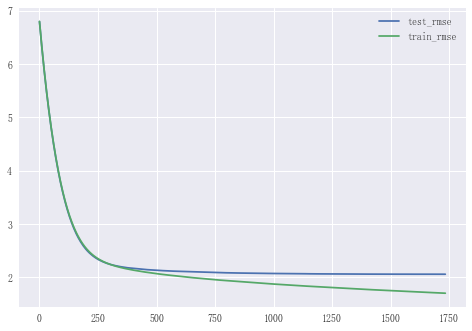

In [88]:
# 训练一个针对值比较高的回归器
from xgboost.sklearn import XGBRegressor
# from sklearn.metrics import f1_score
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
import xgboost as xgb_high
from sklearn.preprocessing import PolynomialFeatures

#  划分样本集
data_high = train_data[targets['血糖']>targets['血糖'].mean()]
targets_high = targets[targets['血糖']>targets['血糖'].mean()]
train_x,test_x,train_y,test_y = train_test_split(data_high,targets_high,test_size=0.18,random_state=66)
#training xgboost
dtrain = xgb_high.DMatrix(train_x,label=train_y)
dtest = xgb_high.DMatrix(test_x)
# 交叉验证
params={'booster':'gbtree',
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'max_depth':3,
    'lambda':200,
    'subsample':0.85,
    'colsample_bytree':0.7,
    'eta': 0.01,#0.002
    'seed':1024,
    'nthread':3,
    'reg_alpha':0
    }

# 设置参数
watchlist  = [(dtrain,'train')]

#通过cv找最佳的nround
cv_log = xgb_high.cv(params,dtrain,num_boost_round=2500,nfold=4,metrics='rmse',early_stopping_rounds=50,seed=1024)
# bst_rmse= cv_log['test-rmse-mean'].min()
# cv_log['nb'] = cv_log.index
# cv_log.index = cv_log['test-rmse-mean']
# bst_nb = cv_log.nb.to_dict()[bst_rmse]
# model = xgb_high.train(params,dtrain,num_boost_round=500,evals=watchlist,early_stopping_rounds=50)
# pre_y_xgb = model.predict(dtest)
# plt.figure(figsize=(15,30))
# xgb.plot_importance(cv_log)
plt.plot(cv_log.index,cv_log['test-rmse-mean'],label='test_rmse')
plt.plot(cv_log.index,cv_log['train-rmse-mean'],label='train_rmse')
plt.legend(loc='upper right')
plt.show()

# 交叉验证输出

# pre_train_y = xgb.predict(train_x)
# print(mse(train_y,pre_train_y))

#predict test set
# pre_y = model.predict(dtest)
# print(mse(test_y,pre_y))

Int64Index([2414, 3395, 1274, 4630, 4742, 3086, 4603,  641, 4673, 5169,
            ...
            2881, 5211, 5062, 5160, 4714, 2243, 3763, 4689,  929, 2049],
           dtype='int64', length=308)

In [61]:
# pre_y = xgboost.predict_proba(test_x)[:,1]
pro_y = xgb.predict(dtest)
# sum(test_y == pre_y)/test_y.shape[0]

In [75]:
pre_y.shape

(1016,)

In [73]:
from sklearn.metrics import recall_score
pre_y = np.where(pro_y>0.07,1,0)
recall_score(test_labels,pre_y)

0.8441558441558441

In [92]:
sum(pre_y)/pre_y.shape[0]

0.39135058489897201

In [97]:
2.58*2.58

6.6564000000000005

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test_mse: 6.4541877439
train_mse: 2.89526134937


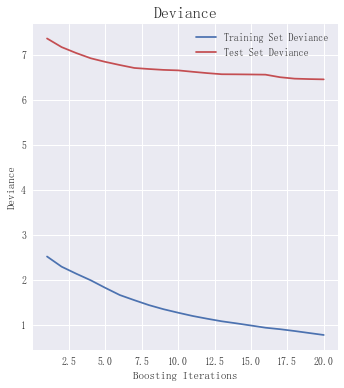

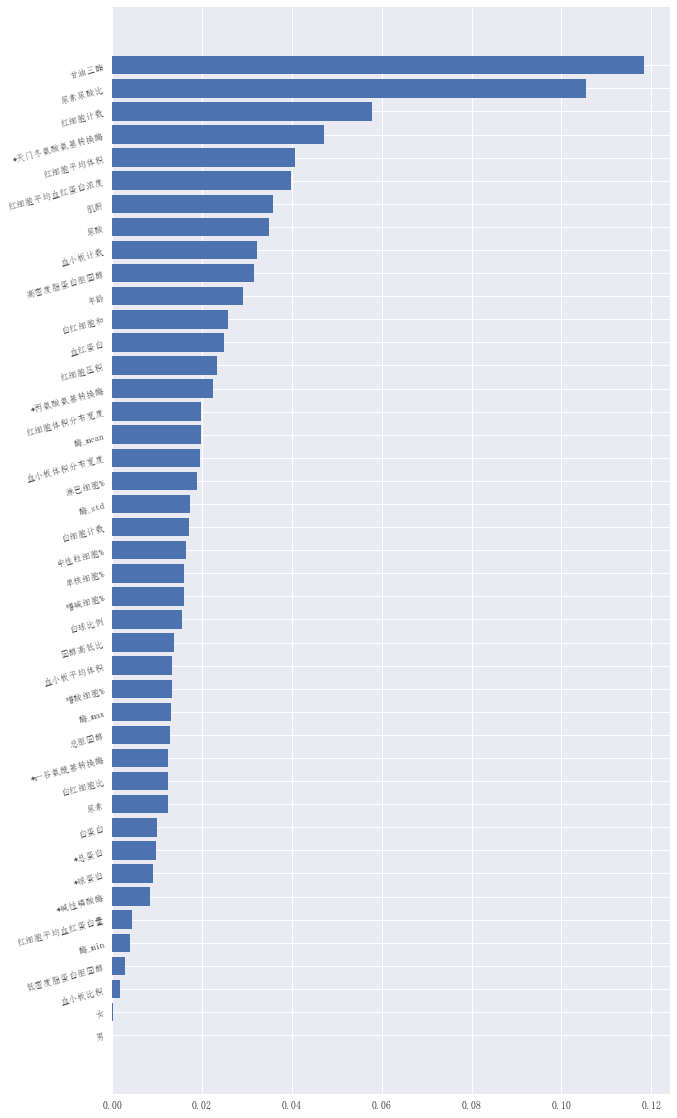

In [94]:


from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Ridge,LinearRegression,ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
# Fit regression mo#  划分样本集
# train_x,test_x,train_y,test_y = train_test_split(train_data,targets,test_size=0.3,random_state=66)
train_up = MinMaxScaler().fit_transform(train_up)
from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(2)
# train_up = poly.fit_transform(train_up)
train_x,test_x,train_y,test_y = train_test_split(train_up,targets_up,test_size=0.3,random_state=66)
# train_x0,test_x0,train_y0,test_y0 = train_test_split(train,target,test_size=0.3,random_state=66)

def learner(clf):
    # 训练
    clf.fit(train_x, train_y)

    # 预测
    pre_y = clf.predict(test_x)
    print('test_mse:',mse(test_y,pre_y))
    pre_train_y = clf.predict(train_x)
    print('train_mse:',mse(train_y,pre_train_y))
    return clf,pre_y,pre_train_y
# clf = ElasticNet(alpha=0.01,l1_ratio=0.05)
# (clf,pre_y,pre_train_y)=learner(clf)
# KR = KernelRidge()
params = {'n_estimators': 20, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.08, 'loss': 'huber','warm_start':True,'alpha':0.9}
gbdt = GradientBoostingRegressor(**params)
(gbdt,pre_y,pre_train_y) = learner(gbdt)
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
train_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, pre_y in enumerate(gbdt.staged_predict(test_x)):
    test_score[i] = mse(test_y, pre_y)
for i, pre_train_y in enumerate(gbdt.staged_predict(train_x)):
    train_score[i] = mse(train_y, pre_train_y)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gbdt.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
# # 画出特征重要性图
features = list(train_data.columns)
feature_important = gbdt.feature_importances_
df_feature = pd.DataFrame({'features':features,'feature_important':feature_important})
df_feature.sort_values(by='feature_important',inplace=True)
plt.figure(figsize=(10,20))
plt.barh(np.arange(len(features)),df_feature['feature_important'])
plt.yticks(np.arange(len(features)),df_feature['features'],fontsize=9,rotation=15)
plt.show()


In [27]:
?ElasticNet()

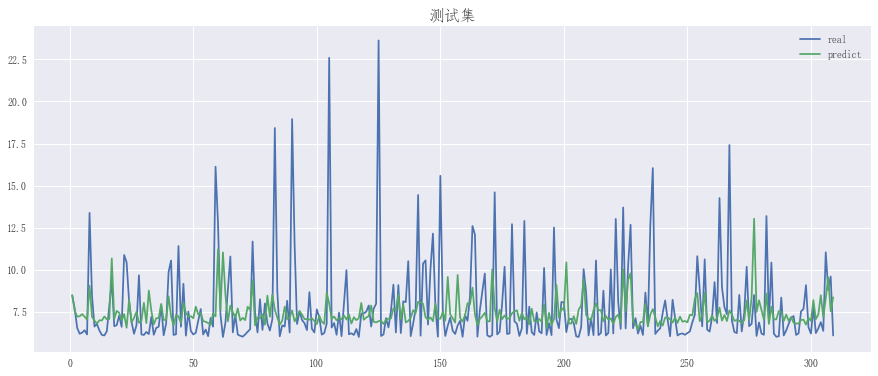

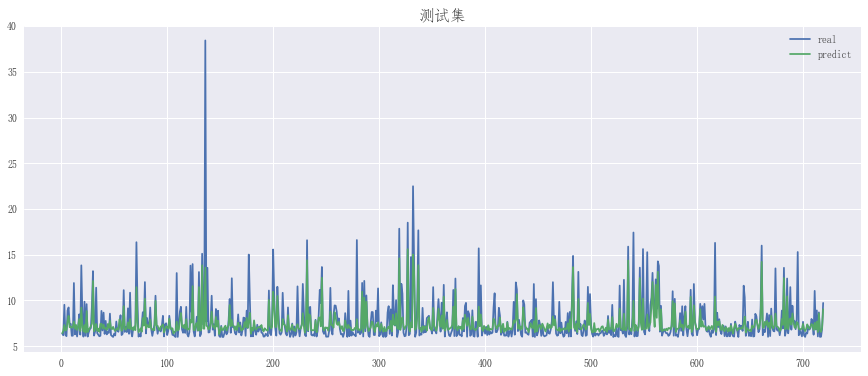

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


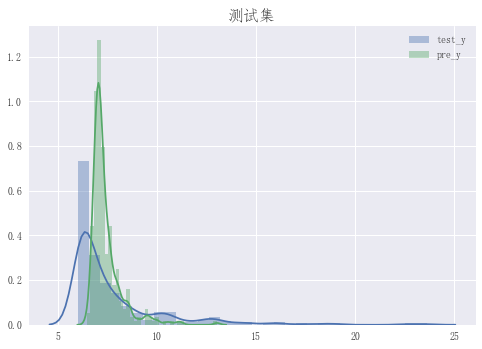

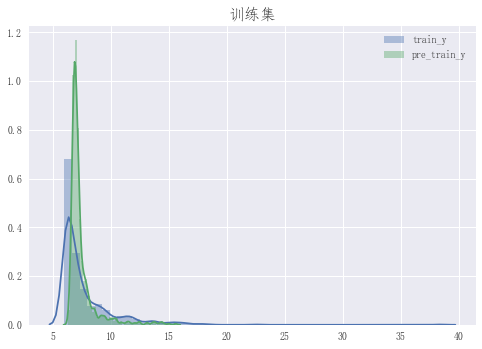

In [95]:
plt.figure(figsize=(15,6))
plt.plot(np.arange(test_y.shape[0])+1,test_y,label='real')
plt.plot(np.arange(pre_y.shape[0])+1,pre_y,label='predict')
plt.legend(loc='upper right')
plt.title('测试集')
plt.show()
plt.figure(figsize=(15,6))
plt.plot(np.arange(train_y.shape[0])+1,train_y,label='real')
plt.plot(np.arange(pre_train_y.shape[0])+1,pre_train_y,label='predict')
plt.legend(loc='upper right')
plt.title('测试集')
plt.show()
sns.distplot(test_y,label='test_y')
sns.distplot(pre_y,label='pre_y')
plt.title('测试集')
plt.legend(loc='upper right')
plt.show()
sns.distplot(train_y,label='train_y')
sns.distplot(pre_train_y,label='pre_train_y')
plt.title('训练集')
plt.legend(loc='upper right')
plt.show()

In [49]:
train_x,test_x,train_y,test_y = train_test_split(train,target,test_size=0.3,random_state=66)
KR0 = LinearRegression()
KR0.fit(train_x, train_y)
pre_y= KR0.predict(test_x)
# pre_y[pre_y>30] = targets.mean()
# 预测
mse_test =mse(test_y,pre_y)
print(mse_test)
pre_train_y = KR0.predict(train_x)
# pre_train_y[pre_train_y>30] = targets.mean()
mse_train = mse(train_y,pre_train_y)
print(mse_train)

0.27752738785
0.267443329834
